In [14]:
import sys 
sys.path.append("..")

In [15]:
from DataPrep.Data_cleaning import clean_paloalto

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy
import math
import plotly.express as px

import numpy as np
import pandas as pd
import datetime as dt
import time
import matplotlib.pyplot as plt


In [6]:
#class Buckets:
#    def __init__(self):
#        self.df = pd.read_csv('CenteredData.csv')
#        self.df = self.to_date(self.df)
#        self.df = self.to_float(self.df)
#
#
#    def to_float(self,df):
#        df["Charging Time (hh:mm:ss)"][df["Charging Time (hh:mm:ss)"]==" -   "]=0
#        df["Charging Time (hh:mm:ss)"]=df["Charging Time (hh:mm:ss)"].dt.hour * 60 + df["Charging Time (hh:mm:ss)"].dt.minute + df["Charging Time (hh:mm:ss)"].dt.second/60
#
#        df["Total Duration (hh:mm:ss)"][df["Total Duration (hh:mm:ss)"]==" -   "]=0
#        df["Total Duration (hh:mm:ss)"]=df["Total Duration (hh:mm:ss)"].dt.hour *60 + df["Total Duration (hh:mm:ss)"].dt.minute + df["Total Duration (hh:mm:ss)"].dt.second/60
#        return df
#
#    def to_date(self,df):
#        print(df.head())
#        df["Start Date"]=pd.to_datetime(df["Start Date"],format="%Y-%m-%d %H:%M:%S",errors="coerce")
#        df["End Date"]=pd.to_datetime(df["End Date"],format="%Y-%m-%d %H:%M:%S",errors="coerce")
#
#        df["Total Duration (hh:mm:ss)"]=pd.to_datetime(df["Total Duration (hh:mm:ss)"],format="%Y-%m-%d %H:%M:%S")
#        df["Charging Time (hh:mm:ss)"]=pd.to_datetime(df["Charging Time (hh:mm:ss)"],format="%Y-%m-%d %H:%M:%S")
#        return df
#
#    def proportionalsplit(self, s, freq="2H"):
#        '''
#        From StackOverflow: https://stackoverflow.com/questions/66274081/how-to-discretize-time-series-with-overspilling-durations/66280942#66280942
#        '''
#        st = s["Start Date"]
#        etCharge = st + pd.Timedelta(minutes=s["Charging Time (hh:mm:ss)"])
#        trCharge = pd.date_range(st.floor(freq), etCharge, freq=freq)
#        etPark = st + pd.Timedelta(minutes=s["Total Duration (hh:mm:ss)"])
#        trPark = pd.date_range(st.floor(freq), etPark, freq=freq)
#        lmin = {"2H":120}
#        # ratio of how numeric values should be split across new buckets
#        ratioCharge = np.minimum((np.where(trCharge<st, trCharge.shift()-st, etCharge-trCharge)/(10**9*60)).astype(int), np.full(len(trCharge),lmin[freq]))
#        ratioCharge = ratioCharge / ratioCharge.sum()
#
#        ratioPark = np.minimum((np.where(trPark<st, trPark.shift()-st, etPark-trPark)/(10**9*60)).astype(int), np.full(len(trPark),lmin[freq]))
#        ratioPark = ratioCharge / ratioCharge.sum()
#
#        return {"Start Date":trCharge, "Original Duration":np.full(len(trCharge), s["Charging Time (hh:mm:ss)"]), 
#                "Original Start":np.full(len(trCharge), s["Start Date"]), 
#                "Original Index": np.full(len(trCharge), s.name),
#                "Charging Time (hh:mm:ss)": s["Charging Time (hh:mm:ss)"] * ratioCharge,
#                "Energy (kWh)": s["Energy (kWh)"] * ratioCharge,
#                "Total Duration (hh:mm:ss)": s["Total Duration (hh:mm:ss)"] * ratioPark,
#                "Longitude": np.full(len(trCharge),s["CenterLon"]), "Latitude": np.full(len(trCharge),s["Latitude"]), "Original Port Type": np.full(len(trCharge),s["Port Type"]), "Port Number": np.full(len(trCharge), s["Port Number"]), 
#                "Fee": s["Fee"] * ratioCharge, "Label": s["Label"]
#            }
#
#    def main(self):
#        df2 = pd.concat([pd.DataFrame(v) for v in self.df.apply(self.proportionalsplit, axis=1).values]).reset_index(drop=True)
#        # everything OK?
#
#
#        # let's have a look at everything in 2H resample...
#        df3 = df2.groupby(["Start Date"]).agg({**{c:lambda s: list(s) for c in df2.columns if "Original" in c},
#                                        **{c:"sum" for c in ["Charging Time (hh:mm:ss)","Energy (kWh)", "Total Duration (hh:mm:ss)", "Port Number"]}})
#
#
#
#        print(df2.head(20))
#        print(df3.head(20))
#
#        #df2.to_csv("data\createdDat\TimeBuckets.csv")
#
#        #end = time.time()
#        #print(end - start)
#        return df2, df3

In [17]:
b = Buckets()

   Unnamed: 0                Station Name       MAC Address  \
0           0  PALO ALTO CA / HAMILTON #1  000D6F00015A9D76   
1           1  PALO ALTO CA / HAMILTON #1  000D6F00015A9D76   
2           2  PALO ALTO CA / HAMILTON #1  000D6F00015A9D76   
3           3  PALO ALTO CA / HAMILTON #1  000D6F00015A9D76   
4           4  PALO ALTO CA / HAMILTON #1  000D6F00015A9D76   

            Org Name           Start Date Start Time Zone  \
0  City of Palo Alto  2011-07-29 20:17:00             PDT   
1  City of Palo Alto  2011-07-30 00:00:00             PDT   
2  City of Palo Alto  2011-07-30 08:16:00             PDT   
3  City of Palo Alto  2011-07-30 14:51:00             PDT   
4  City of Palo Alto  2011-07-30 18:51:00             PDT   

              End Date End Time Zone Total Duration (hh:mm:ss)  \
0  2011-07-29 23:20:00           PDT       1900-01-01 03:03:32   
1  2011-07-30 00:02:00           PDT       1900-01-01 00:02:06   
2  2011-07-30 12:34:00           PDT       1900-01-01 04

<ipython-input-6-05292f05ad4c>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Charging Time (hh:mm:ss)"][df["Charging Time (hh:mm:ss)"]==" -   "]=0
<ipython-input-6-05292f05ad4c>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Total Duration (hh:mm:ss)"][df["Total Duration (hh:mm:ss)"]==" -   "]=0


In [18]:
df = b.df

In [19]:
df

,Unnamed: 0,Station Name,MAC Address,Org Name,Start Date,Start Time Zone,End Date,End Time Zone,Total Duration (hh:mm:ss),Charging Time (hh:mm:ss),...,Fee,Ended By,Plug In Event Id,Driver Postal Code,User ID,ID,Pairlocation,Label,CenterLon,CenterLat
0,0,PALO ALTO CA / HAMILTON #1,000D6F00015A9D76,City of Palo Alto,2011-07-29 20:17:00,PDT,2011-07-29 23:20:00,PDT,183.533333,114.050000,...,0.00,Plug Out at Vehicle,3,95124.0,3284.0,0,37.445x-122.16,1,-122.160000,37.444473
1,1,PALO ALTO CA / HAMILTON #1,000D6F00015A9D76,City of Palo Alto,2011-07-30 00:00:00,PDT,2011-07-30 00:02:00,PDT,2.100000,1.900000,...,0.00,Customer,4,94301.0,4169.0,0,37.445x-122.16,1,-122.160000,37.444473
2,2,PALO ALTO CA / HAMILTON #1,000D6F00015A9D76,City of Palo Alto,2011-07-30 08:16:00,PDT,2011-07-30 12:34:00,PDT,257.533333,257.466667,...,0.00,Plug Out at Vehicle,5,94301.0,4169.0,0,37.445x-122.16,1,-122.160000,37.444473
3,3,PALO ALTO CA / HAMILTON #1,000D6F00015A9D76,City of Palo Alto,2011-07-30 14:51:00,PDT,2011-07-30 16:55:00,PDT,123.400000,122.966667,...,0.00,Customer,6,94302.0,2545.0,0,37.445x-122.16,1,-122.160000,37.444473
4,4,PALO ALTO CA / HAMILTON #1,000D6F00015A9D76,City of Palo Alto,2011-07-30 18:51:00,PDT,2011-07-30 20:03:00,PDT,71.400000,43.900000,...,0.00,Plug Out at Vehicle,7,94043.0,3765.0,0,37.445x-122.16,1,-122.160000,37.444473
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249427,249427,PALO ALTO CA / TED THOMPSON #3,0024B10000029F81,City of Palo Alto,2020-12-31 16:39:00,PST,2020-12-31 17:14:00,PST,35.733333,35.300000,...,0.42,Plug Out at Vehicle,2369,94301.0,2024201.0,41,37.429x-122.144,7,-122.143998,37.428413
249428,249428,PALO ALTO CA / WEBSTER #1,0024B10000024233,City of Palo Alto,2020-12-31 16:48:00,PST,2020-12-31 20:31:00,PST,223.016667,134.066667,...,4.69,Plug Out at Vehicle,7255,94541.0,242661.0,34,37.448x-122.158,4,-122.158000,37.448135
249429,249429,PALO ALTO CA / MPL #4,0024B1000003CD37,City of Palo Alto,2020-12-31 17:28:00,PST,2021-01-01 10:56:00,PST,1048.233333,308.200000,...,6.82,Plug Out at Vehicle,455,94306.0,449995.0,53,37.422x-122.114,2,-122.113219,37.422000
249430,249430,PALO ALTO CA / WEBSTER #1,0024B10000024233,City of Palo Alto,2020-12-31 17:49:00,PST,2020-12-31 21:55:00,PST,245.566667,233.700000,...,2.75,Plug Out at Vehicle,7256,94552.0,804075.0,34,37.448x-122.158,4,-122.158000,37.448135


In [27]:
sorted(df['Label'].unique())

[0, 1, 2, 3, 4, 5, 6, 7]

In [28]:
df.columns

Index(['Unnamed: 0', 'Station Name', 'MAC Address', 'Org Name', 'Start Date',
       'Start Time Zone', 'End Date', 'End Time Zone',
       'Total Duration (hh:mm:ss)', 'Charging Time (hh:mm:ss)', 'Energy (kWh)',
       'GHG Savings (kg)', 'Gasoline Savings (gallons)', 'Port Type',
       'Port Number', 'Plug Type', 'Address 1', 'City', 'State/Province',
       'Postal Code', 'Country', 'Latitude', 'Longitude', 'Currency', 'Fee',
       'Ended By', 'Plug In Event Id', 'Driver Postal Code', 'User ID', 'ID',
       'Pairlocation', 'Label', 'CenterLon', 'CenterLat'],
      dtype='object')

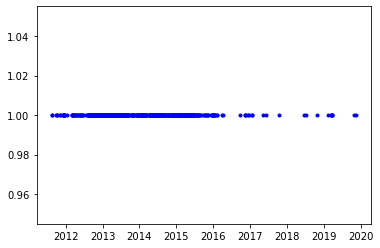

In [68]:
colors = ['black', 'blue']
plt.plot(df[(df['Label'] == 1) & (df['Plug Type'] == 'NEMA 5-20R')]['Start Date'], df[(df['Label'] == 1) & (df['Plug Type'] == 'NEMA 5-20R')]['Port Number'], '.', color = colors[1])

plt.show() #'NEMA 5-20R'


In [64]:
Plugs = ['J1772' , 'NEMA 5-20R']
for j in range(0,2): 
    print(Plugs[j])

J1772
NEMA 5-20R


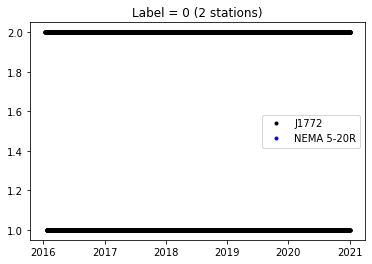

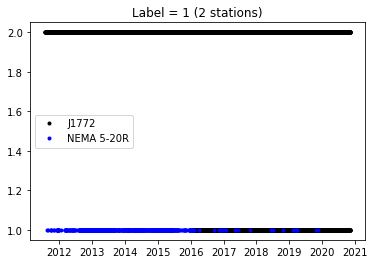

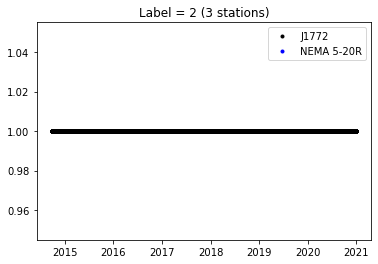

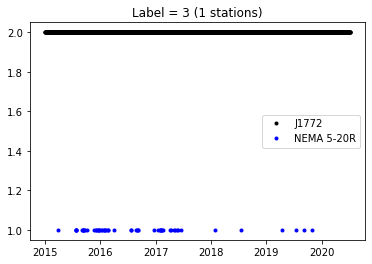

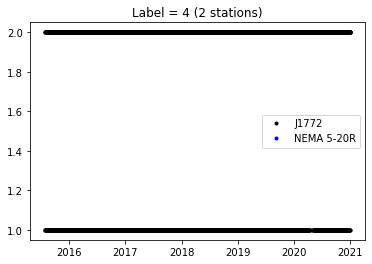

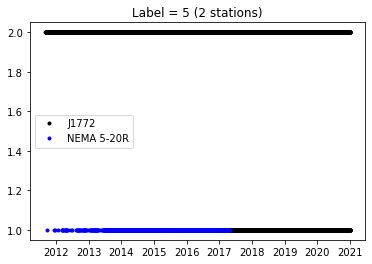

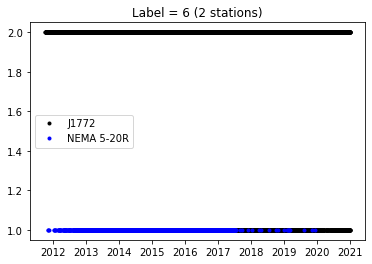

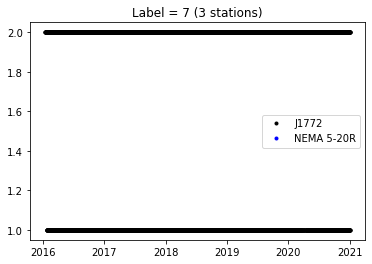

In [107]:
nrSt = [2,2,3,1,2,2,2,3]
Plugs = ['J1772' , 'NEMA 5-20R']
colors = ['black', 'blue']
for i in range(0,8):
    for j in range(0,2):
        plt.plot(df[(df['Label'] == i) & (df['Plug Type'] == Plugs[j])]['Start Date'], df[(df['Label'] == i) & (df['Plug Type'] == Plugs[j])]['Port Number'], '.', color = colors[j])
        plt.title(f'Label = {i} ({nrSt[i]} stations)')
        plt.legend(Plugs)
    plt.show()

So the question is: 
How many plugs, and of what types, do we have at the different Labels on a given time? 